In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [23]:

import pandas as pd
import numpy as np
#import iexfinance
#from iexfinance.stocks import get_historical_data
from datetime import datetime, date

# start date should be within 5 years of current date according to iex API we have used
# The more data we have, the better results we get!


# use your token in place of token which you will get after signing up on IEX cloud
# Head over to https://iexcloud.io/ and sign-up to get your API token


In [26]:
df =  pd.read_csv(r"C:\Users\SHARAL PRIYA\Downloads\NSE-TATA.csv")
start = datetime(2016, 1, 1)
end = date.today()

In [27]:
df.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


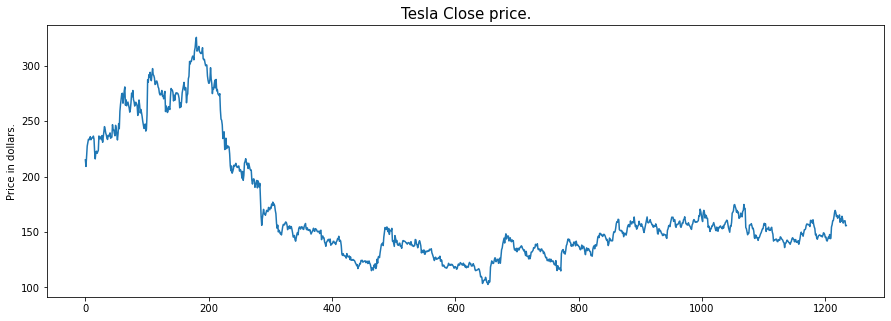

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [31]:
df.isnull().sum()


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

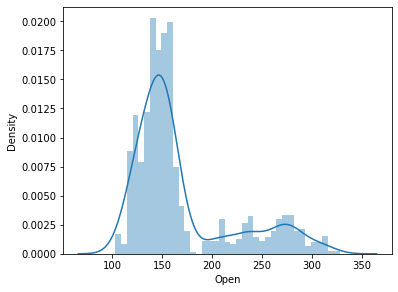

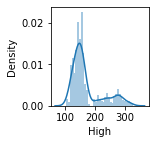

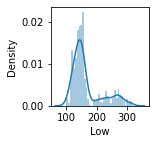

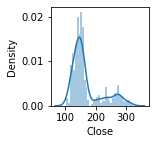

In [38]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()


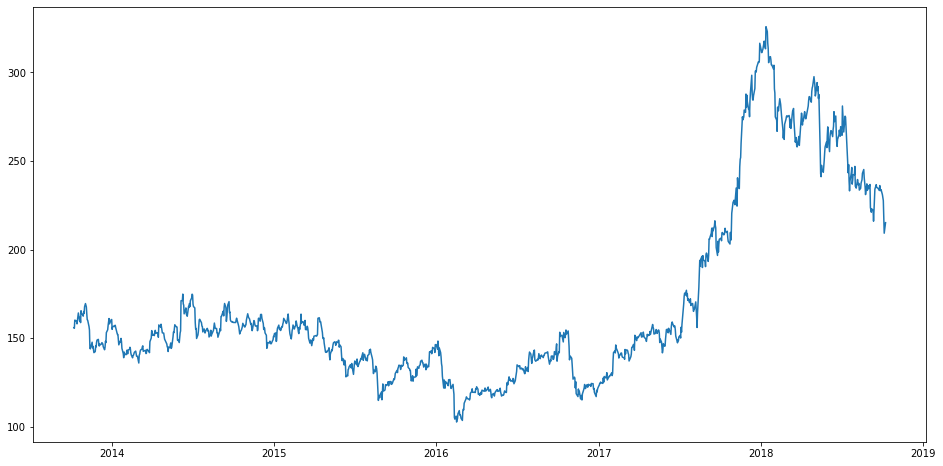

In [67]:
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

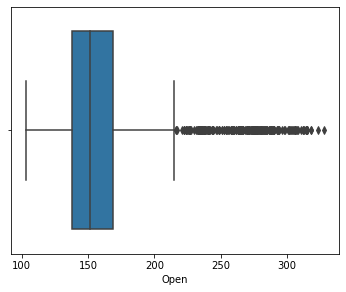

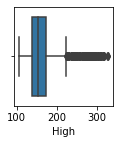

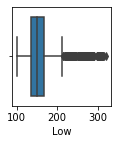

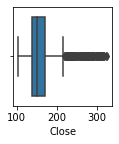

In [40]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()


In [43]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83,8,10,2018
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06,5,10,2018
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79,4,10,2018
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27,3,10,2018
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05,1,10,2018


In [44]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year,is_quarter_end
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83,8,10,2018,0
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06,5,10,2018,0
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79,4,10,2018,0
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27,3,10,2018,0
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05,1,10,2018,0


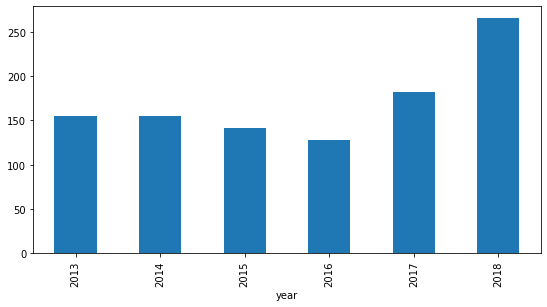

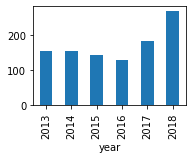

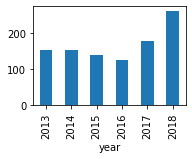

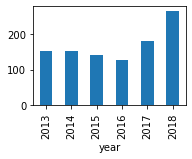

In [46]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()


In [47]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year
is_quarter_end,,,,,,,,,,
0,169.356916,171.816585,166.733782,169.049266,169.035251,2.614783e+06,4878.112815,15.839657,5.987760,2015.801714
1,168.169019,170.671651,165.754426,168.124761,168.136483,2.583370e+06,4774.862344,15.645933,7.521531,2015.712919


In [48]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


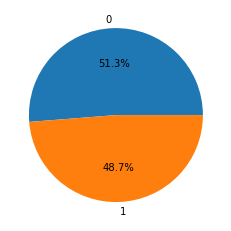

In [66]:
plt.pie(df['target'].value_counts().values,
labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [51]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1111, 3) (124, 3)


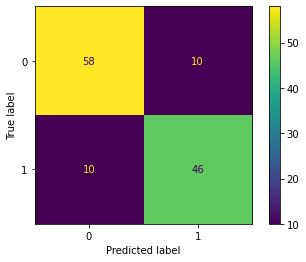

In [65]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()
